In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [4]:
dataset= pd.read_csv('calories.csv')
dataset.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [5]:
dataset.shape

(15000, 9)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [7]:
dataset.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [8]:
dataset.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

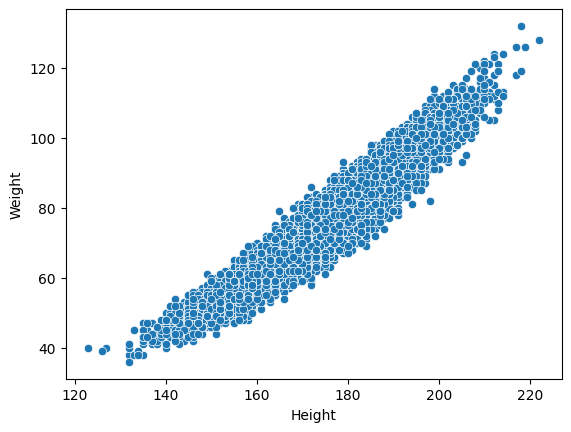

In [9]:
sb.scatterplot(x='Height', y='Weight', data=dataset)
plt.show()

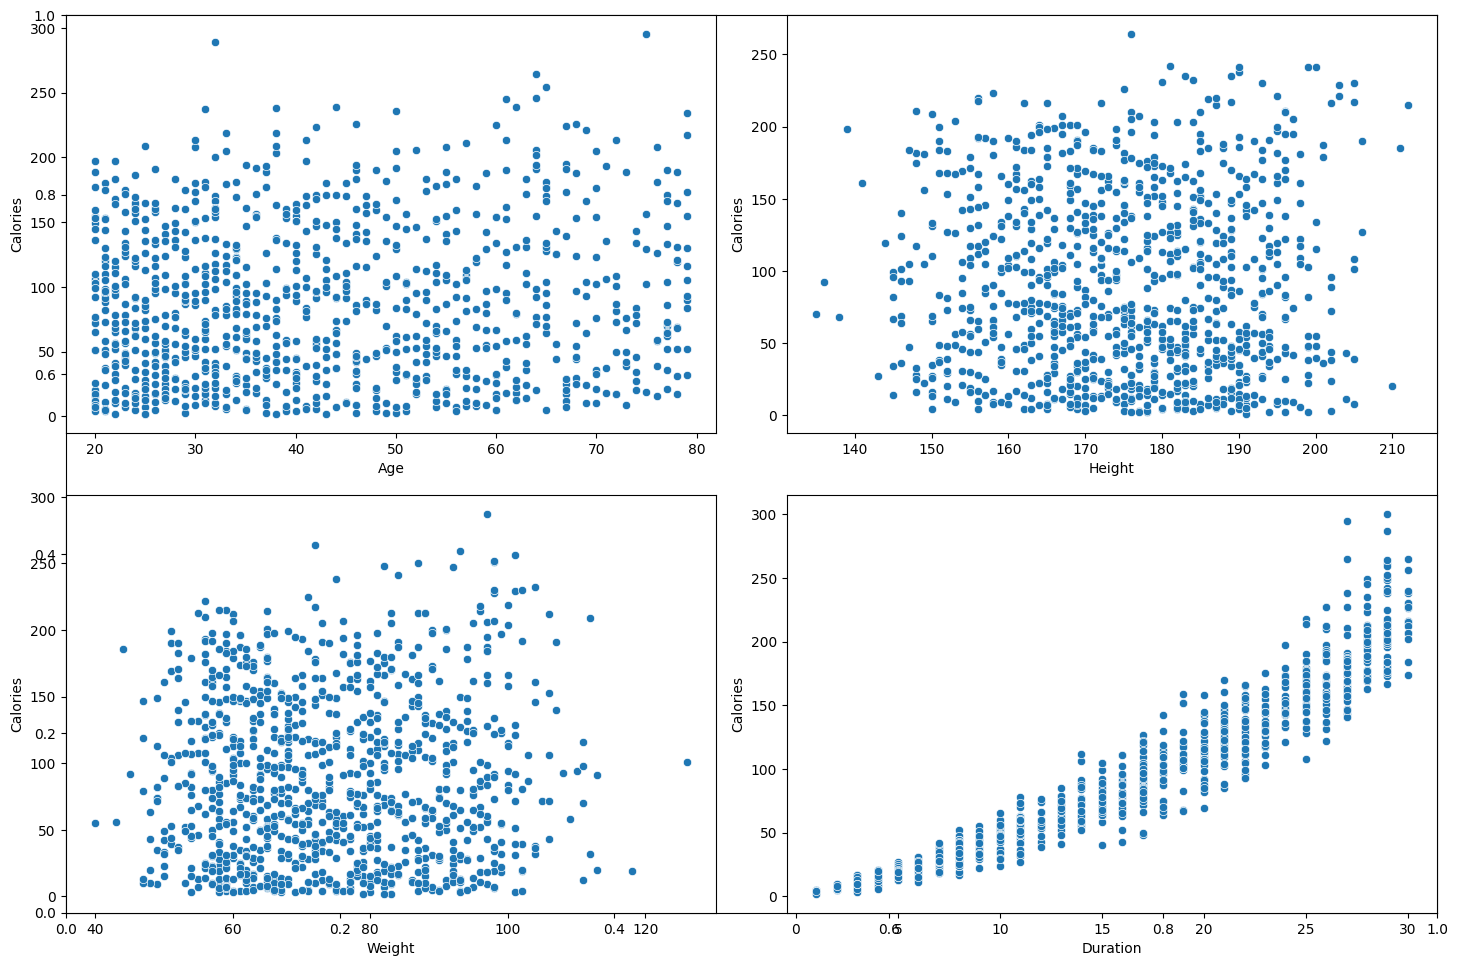

In [11]:
features = ['Age', 'Height', 'Weight', 'Duration']

plt.subplots(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    x = dataset.sample(1000)
    sb.scatterplot(x=col, y='Calories', data=x)
plt.tight_layout()
plt.show()

In [12]:
list1=['Gender']
dataset[list1]=dataset[list1].replace({'male':0,'female':1})

In [13]:
dataset.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


<Axes: >

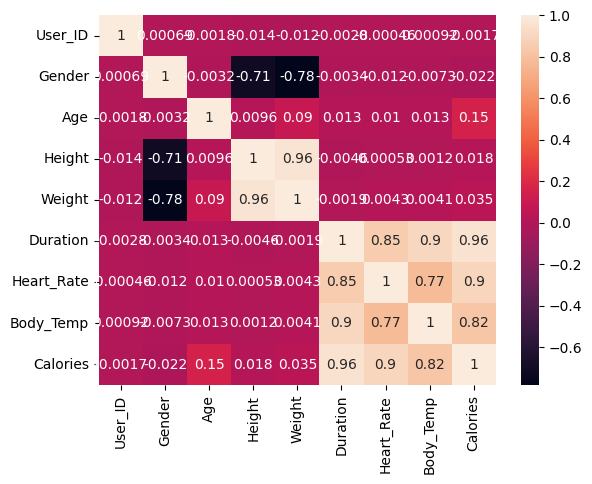

In [14]:
corr = dataset.corr()
sb.heatmap(corr,annot=True)

In [15]:
x = dataset[['Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']]
y = dataset['Calories']

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [17]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(x_train,y_train)
print("Training score",model1.score(x_train,y_train))

Training score 0.9671621074066676


In [18]:
from sklearn.linear_model import LogisticRegression
model2=LogisticRegression(random_state=1)
model2.fit(x_train,y_train)
print("Training score",model2.score(x_train,y_train))

Training score 0.05316666666666667


In [19]:
from sklearn.neighbors import KNeighborsClassifier
model3=KNeighborsClassifier()
model3.fit(x_train,y_train)
print("Training score",model3.score(x_train,y_train))

Training score 0.20616666666666666


In [20]:
from sklearn.ensemble import RandomForestRegressor
model4=RandomForestRegressor(random_state=1)
model4.fit(x_train,y_train)
print("Training score",model4.score(x_train,y_train))

Training score 0.9996866083821466


In [21]:
model4.fit(x_train,y_train)

RandomForestRegressor(random_state=1)

In [22]:
print("Training Score",model4.score(x_train,y_train))

Training Score 0.9996866083821466


In [23]:
import pickle

pickle.dump(model4,open('calories.pkl','wb'))

In [24]:
mod=pickle.load(open('calories.pkl','rb'))

In [25]:
print(mod.predict([[0,68,190.0,94.0,29.0,105.0,40.8]]))

[230.22]


In [26]:
print(mod.predict([[1,27,154.0,58.0,10.0,81.0,39.8]]))

[35.13]


# HEALTH RISK

In [27]:
df=pd.read_csv('calories.csv')
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [28]:
df['BMI'] = df['Weight'] / ((df['Height'] / 100) ** 2)

In [ ]:
def assign_health_risk(row):
    if row['BMI'] > 30 or row['Heart_Rate'] > 120 or row['Body_Temp'] > 39:
        return '0'
    elif row['BMI'] < 25 or row['Heart_Rate'] < 100 or row['Body_Temp'] < 38:
        return '1'
    else:
        return '2'

df['Health_Risk'] = df.apply(assign_health_risk, axis=1)


In [30]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,BMI,Health_Risk
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0,26.038781,0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0,21.773842,0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0,24.655910,1
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0,22.159109,0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0,24.456063,0


In [96]:
a = df[['Age', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']]
b = df['Health_Risk']

In [97]:
from sklearn.model_selection import train_test_split

a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2, random_state=42)


In [98]:
from sklearn.ensemble import RandomForestClassifier

health1 = RandomForestClassifier()
health1.fit(a_train, b_train)
b_pred = health1.predict(a_test)
from sklearn.metrics import classification_report

print(classification_report(b_test, b_pred))  


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2632
           1       0.97      0.97      0.97       316
           2       0.79      0.81      0.80        52

    accuracy                           0.99      3000
   macro avg       0.92      0.92      0.92      3000
weighted avg       0.99      0.99      0.99      3000



In [99]:
from sklearn.tree import DecisionTreeClassifier
health2=DecisionTreeClassifier(random_state=1)
health2.fit(a_train,b_train)
b_pred2=health2.predict(a_test)
print(classification_report(b_test,b_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2632
           1       0.96      0.97      0.97       316
           2       0.83      0.77      0.80        52

    accuracy                           0.99      3000
   macro avg       0.93      0.91      0.92      3000
weighted avg       0.99      0.99      0.99      3000



In [100]:
from sklearn.naive_bayes import GaussianNB
health3=GaussianNB()
health3.fit(a_train,b_train)
b_pred3=health3.predict(a_test)
print(classification_report(b_test,b_pred3))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98      2632
           1       0.70      0.93      0.80       316
           2       0.69      0.94      0.80        52

    accuracy                           0.95      3000
   macro avg       0.80      0.94      0.86      3000
weighted avg       0.96      0.95      0.95      3000



In [101]:
from sklearn.svm import SVC
health4=SVC(random_state=1)
health4.fit(a_train,b_train)
b_pred4=health4.predict(a_test)
print(classification_report(b_test,b_pred4))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2632
           1       0.75      0.87      0.81       316
           2       0.00      0.00      0.00        52

    accuracy                           0.96      3000
   macro avg       0.58      0.62      0.60      3000
weighted avg       0.94      0.96      0.95      3000



In [102]:
health1.fit(a_train,b_train)

RandomForestClassifier()

In [103]:
print("Training Score",health1.score(a_train,b_train))

Training Score 1.0


In [104]:
pickle.dump(health1,open('health.pkl','wb'))

In [105]:
mod1=pickle.load(open('health.pkl','rb'))

In [106]:
print(mod1.predict([[68,94.0,29.0,105.0,40.8]]))

['0']


In [107]:
print(mod1.predict([[69,79.0,5.0,88.0,38.7]]))

['1']


# ASSIGN ACTIVITY

In [43]:
def assign_activity(row):
    if row['Heart_Rate'] < 100:
        return '0'
    elif row['Heart_Rate'] < 130:
        return '1'
    else:
        return '2'

df['Activity'] = df.apply(assign_activity, axis=1)

In [44]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,BMI,Health_Risk,Activity
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0,26.038781,0,1
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0,21.773842,0,0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0,24.655910,1,0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0,22.159109,0,1
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0,24.456063,0,0


In [45]:
list2=['Gender']
df[list2]=df[list2].replace({'male':0,'female':1})

In [46]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,BMI,Health_Risk,Activity
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0,26.038781,0,1
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0,21.773842,0,0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0,24.655910,1,0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0,22.159109,0,1
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0,24.456063,0,0


In [47]:
m = df[['Duration', 'Heart_Rate', 'Body_Temp', 'Age', 'Gender']]
n = df['Activity']

In [48]:
from sklearn.model_selection import train_test_split

m_train, m_test, n_train, n_test = train_test_split(m, n, test_size=0.2, random_state=42)


In [49]:
from sklearn.ensemble import RandomForestClassifier
act1 = RandomForestClassifier(random_state=42)
act1.fit(m_train, n_train)
n_pred = act1.predict(m_test)
from sklearn.metrics import classification_report

print(classification_report(n_test, n_pred))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1889
           1       1.00      1.00      1.00      1111

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



In [50]:
from sklearn.tree import DecisionTreeClassifier
act2=DecisionTreeClassifier(random_state=1)
act2.fit(m_train,n_train)
n_pred2=act2.predict(m_test)
print(classification_report(n_test,n_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1889
           1       1.00      1.00      1.00      1111

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



In [51]:
from sklearn.naive_bayes import GaussianNB
act3=GaussianNB()
act3.fit(m_train,n_train)
n_pred3=act3.predict(m_test)
print(classification_report(n_test,n_pred3))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      1889
           1       0.84      0.95      0.89      1111

    accuracy                           0.92      3000
   macro avg       0.90      0.92      0.91      3000
weighted avg       0.92      0.92      0.92      3000



In [52]:
from sklearn.svm import SVC
act4=SVC(random_state=1)
act4.fit(m_train,n_train)
n_pred4=act4.predict(m_test)
print(classification_report(n_test,n_pred4))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1889
           1       1.00      0.99      0.99      1111

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



In [53]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(n_test,n_pred)
print(cm)
from sklearn.metrics import accuracy_score
accuracy_score(n_test,n_pred)

[[1889    0]
 [   0 1111]]


1.0

In [54]:
act1.fit(m_train,n_train)

RandomForestClassifier(random_state=42)

In [55]:
print("Training Score",act1.score(m_train,n_train))

Training Score 1.0


In [56]:
pickle.dump(act1,open('activity.pkl','wb'))

In [57]:
mod2=pickle.load(open('activity.pkl','rb'))

In [58]:
print(mod2.predict([[29.0,105.0,40.8,68,0]]))

['1']


In [59]:
print(mod2.predict([[14.0,94.0,40.3,20,1]]))

['0']


# BODY_TEMP

In [60]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,BMI,Health_Risk,Activity
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0,26.038781,0,1
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0,21.773842,0,0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0,24.655910,1,0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0,22.159109,0,1
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0,24.456063,0,0


In [ ]:
# Select features (drop Body_Temp)
g = df[['Age', 'Heart_Rate', 'Duration']]  # you can include more

# Target: Body Temperature
h = df['Body_Temp']


In [62]:
from sklearn.model_selection import train_test_split

g_train, g_test, h_train, h_test = train_test_split(g, h, test_size=0.2, random_state=42)


In [63]:
from sklearn.linear_model import LinearRegression

temp1 = LinearRegression()
temp1.fit(g_train, h_train)
print("Training score",temp1.score(g_train,h_train))

Training score 0.5948246426976065


In [64]:
from sklearn.tree import DecisionTreeRegressor
temp2=DecisionTreeRegressor(random_state=1)
temp2.fit(g_train,h_train)
print("Training score",temp2.score(g_train,h_train))

Training score 0.9767266293733535


In [65]:
from sklearn.neighbors import KNeighborsRegressor
temp3=KNeighborsRegressor()
temp3.fit(g_train,h_train)
print("Training score:", temp3.score(g_train, h_train))

Training score: 0.7027586129055912


In [66]:
from sklearn.ensemble import RandomForestRegressor
temp4=RandomForestRegressor(random_state=1)
temp4.fit(g_train,h_train)
print("Training score",temp4.score(g_train,h_train))

Training score 0.9211792529806122


In [67]:
temp2.fit(g_train,h_train)

DecisionTreeRegressor(random_state=1)

In [68]:
print("Training Score",temp2.score(g_train,h_train))

Training Score 0.9767266293733535


In [69]:
pickle.dump(temp2,open('body_temp.pkl','wb'))

In [70]:
mod3=pickle.load(open('body_temp.pkl','rb'))

In [71]:
print(mod3.predict([[68,105.0,94.0]]))

[40.8]


In [72]:
print(mod3.predict([[69,88.0,79.0]]))

[38.7]
